# Approximate the 'ground truth' encoder distribution via finite sampling

In [43]:
import random
import torch
import matplotlib.pyplot as plt
torch.set_printoptions(sci_mode=False)

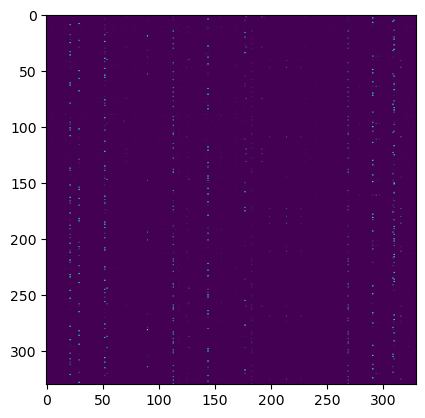

In [44]:
fn = "/Users/nathanielimel/uci/projects/ibsg/multirun/universe=wcs/num_signals=330/prior=wcs_model/dist=squared_dist/meaning_certainty=wcs_model/dynamics=two_population_rd/ii=-2/population_size=None/num_runs=8/seed=42/discr_need=1.0/final_encoders.pt"

final_encoders = torch.load(fn)
enc = final_encoders[4]
plt.imshow(enc)

In [45]:
row = enc[0]
sampled_indices = random.choices(
    population=range(len(row)),
    weights=row,
    k=10,
)

# count
sampled_row = torch.zeros(row.size())
for idx in sampled_indices:
    sampled_row[idx] += 1

# renormalize
sampled_row /= sampled_row.sum()

In [46]:
torch.linalg.vector_norm( row - sampled_row )

tensor(0.0350)

In [59]:
sampled_rows = []
for row in enc:
    # sample
    sampled_indices = random.choices(
    population=range(len(row)),
    weights=row,
    k=10,
    )
    # count
    sampled_row = torch.zeros(row.size())
    for idx in sampled_indices:
        sampled_row[idx] += 1
    # renormalize
    sampled_row /= sampled_row.sum()
    sampled_rows.append(sampled_row)

sampled_encoder = torch.stack(sampled_rows)


torch.linalg.norm( enc - sampled_encoder )

tensor(3.8979)